# Navdeep Sureka 19BCE2679 DA3

### 1) Implement Random forest Trees algorithm and test the algorithm using any data set of your choice. The output should include Accuracy, Error rate, Precision and recall rate along with the confusion matrix.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("DATA/penguins_size.csv")

In [4]:
df=df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [5]:
X= pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y=df["species"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rfc= RandomForestClassifier(n_estimators=10,max_features="auto",random_state=101)

In [9]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [10]:
predictions = rfc.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score
confusion_matrix(y_test,predictions)

array([[53,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 38]])

In [12]:
accuracy_score(y_test,predictions)

0.990990990990991

In [13]:
precision_score(y_test,predictions,average='weighted')

0.9911578244911579

In [14]:
recall_score(y_test,predictions,average='weighted')

0.990990990990991

In [15]:
error_rate=1-accuracy_score(y_test,predictions)
error_rate

0.009009009009009028

### 2. Implement AdaBoost algorithm and test the algorithm using any data set of yourchoice. The output should include Accuracy, Error rate, Precision and recall ratealong with the confusion matrix.

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [18]:
df = pd.read_csv("DATA/mushrooms.csv")

<AxesSubplot:xlabel='class', ylabel='count'>

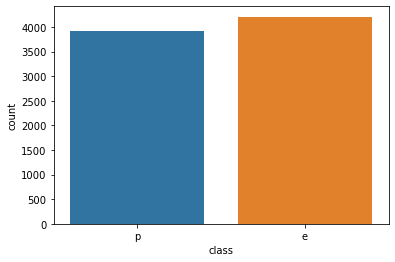

In [19]:
sns.countplot(data=df,x='class')
#Lables are balanced

In [21]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [31]:
n_estimators=[1,2,3,4,5,10,15,20,30,40,50,75,100]
param_grid={"n_estimators":n_estimators}
adb_model=AdaBoostClassifier()

In [32]:
grid=GridSearchCV(adb_model,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 10, 15, 20, 30, 40, 50,
                                          75, 100]})

In [33]:
grid.best_params_

{'n_estimators': 20}

In [34]:
adb_model=AdaBoostClassifier(n_estimators=20)

In [35]:
adb_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [37]:
y_pred = adb_model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score

confusion_matrix(y_test,y_pred)

array([[1274,    0],
       [   0, 1164]])

In [41]:
accuracy_score(y_test,y_pred)

1.0

In [42]:
precision_score(y_test,y_pred,average='weighted')

1.0

In [43]:
recall_score(y_test,y_pred,average='weighted')

1.0

In [44]:
error_rate=1-accuracy_score(y_test,y_pred)
error_rate

0.0